# CIFAR

## Used cifar100 dataset. Out of 100, I removed 90 classes and only selected 10 classes, which could be useful for the blind at indoors 
## (bed, bottle, chair, couch, cup, plate, table, wardrobe, telephone, house) - finally with each having 500 train images and 100 test images

In [305]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
optimizer = Adam()
validation_split = 0.2
verbosity = 1
no_classes = 100
no_epochs = 100

# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255


In [306]:
# Initial Shape of datset
print('Train: X=%s, y=%s' % (input_train.shape, target_train.shape))
print('Test: X=%s, y=%s' % (input_test.shape, target_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [307]:
# List of all classes
fine_label_list =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
                    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
                    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
                    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
                    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
                    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
                    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
                    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

for i, item in enumerate(fine_label_list, start=0):
    print(i,":", item, end=', ')

0 : apple, 1 : aquarium_fish, 2 : baby, 3 : bear, 4 : beaver, 5 : bed, 6 : bee, 7 : beetle, 8 : bicycle, 9 : bottle, 10 : bowl, 11 : boy, 12 : bridge, 13 : bus, 14 : butterfly, 15 : camel, 16 : can, 17 : castle, 18 : caterpillar, 19 : cattle, 20 : chair, 21 : chimpanzee, 22 : clock, 23 : cloud, 24 : cockroach, 25 : couch, 26 : crab, 27 : crocodile, 28 : cup, 29 : dinosaur, 30 : dolphin, 31 : elephant, 32 : flatfish, 33 : forest, 34 : fox, 35 : girl, 36 : hamster, 37 : house, 38 : kangaroo, 39 : computer_keyboard, 40 : lamp, 41 : lawn_mower, 42 : leopard, 43 : lion, 44 : lizard, 45 : lobster, 46 : man, 47 : maple_tree, 48 : motorcycle, 49 : mountain, 50 : mouse, 51 : mushroom, 52 : oak_tree, 53 : orange, 54 : orchid, 55 : otter, 56 : palm_tree, 57 : pear, 58 : pickup_truck, 59 : pine_tree, 60 : plain, 61 : plate, 62 : poppy, 63 : porcupine, 64 : possum, 65 : rabbit, 66 : raccoon, 67 : ray, 68 : road, 69 : rocket, 70 : rose, 71 : sea, 72 : seal, 73 : shark, 74 : shrew, 75 : skunk, 76 : s

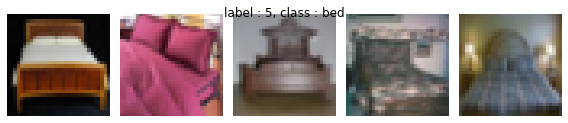

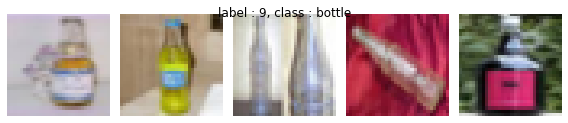

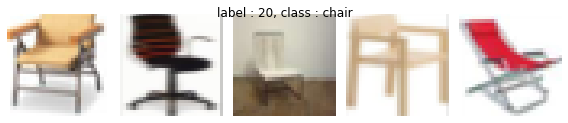

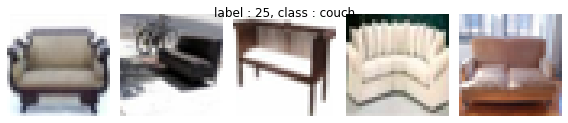

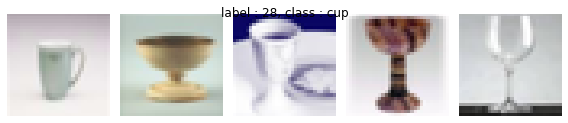

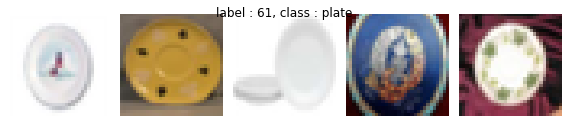

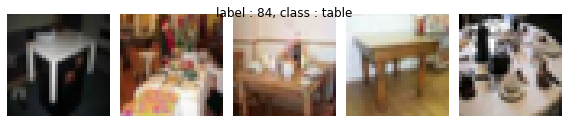

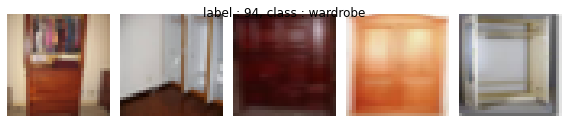

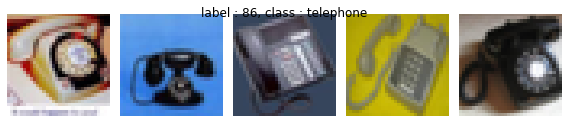

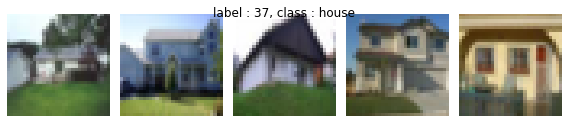

In [308]:
# Identifying List of 10 objects useful for the blind

class_plotted = [
5,	#	bed
9,	#	bottle
20,	#	chair
25,	#	couch
28,	#	cup
61,	#	plate
84,	#	table
94,	#	wardrobe
86,	#	telephone
37,	#	house
#13,	#	bus
#68,	#	road
#71,	#	sea
#40,	#	lamp
]

for i in range(len(class_plotted)):
    image_samples = input_train[target_train.reshape(-1) == class_plotted[i]][:5]
    fig, ax = plt.subplots(nrows = 1, ncols = 5,figsize = (8,8))
    fig.suptitle("label : %d, class : %s" % (class_plotted[i], fine_label_list[class_plotted[i]]), y = .6)
    for j in range(5):
        ax[j].imshow(image_samples[j])
        ax[j].axis('off')  
    fig.tight_layout()
plt.show()

In [309]:
# Keeping only 10 objects data and removing the rest 90

indices_train = np.hstack((np.where(target_train ==	5	),
            np.where(target_train ==	9),
            np.where(target_train ==	20),
            np.where(target_train ==	25),
            np.where(target_train ==	28),
            np.where(target_train ==	61),
            np.where(target_train ==	84),
            np.where(target_train ==	94),
            np.where(target_train ==	86),
            np.where(target_train ==	37),
           ))[0]

np.random.shuffle(indices_train)

input_train = input_train[indices_train]
target_train = target_train[indices_train]

In [310]:
# Keeping only 10 objects data and removing the rest 90

indices_test = np.hstack((np.where(target_test ==	5	),
            np.where(target_test ==	9),
            np.where(target_test ==	20),
            np.where(target_test ==	25),
            np.where(target_test ==	28),
            np.where(target_test ==	61),
            np.where(target_test ==	84),
            np.where(target_test ==	94),
            np.where(target_test ==	86),
            np.where(target_test ==	37),
           ))[0]

np.random.shuffle(indices_test)

input_test = input_test[indices_test]
target_test = target_test[indices_test]

In [311]:
# Final Shape of data
print('Train: X=%s, y=%s' % (input_train.shape, target_train.shape))
print('Test: X=%s, y=%s' % (input_test.shape, target_test.shape))

Train: X=(5000, 32, 32, 3), y=(5000, 1)
Test: X=(1000, 32, 32, 3), y=(1000, 1)


In [312]:
# Number of training images in each class

print(np.unique(target_train))

for i in np.unique(target_train):
  print( fine_label_list[i], "(", i,") : ", np.count_nonzero(target_train == i))


[ 5  9 20 25 28 37 61 84 86 94]
bed ( 5 ) :  500
bottle ( 9 ) :  500
chair ( 20 ) :  500
couch ( 25 ) :  500
cup ( 28 ) :  500
house ( 37 ) :  500
plate ( 61 ) :  500
table ( 84 ) :  500
telephone ( 86 ) :  500
wardrobe ( 94 ) :  500


In [313]:
# Number of testing images in each class
print(np.unique(target_test))

for i in np.unique(target_test):
  print( fine_label_list[i], "(", i,") : ", np.count_nonzero(target_train == i))

[ 5  9 20 25 28 37 61 84 86 94]
bed ( 5 ) :  500
bottle ( 9 ) :  500
chair ( 20 ) :  500
couch ( 25 ) :  500
cup ( 28 ) :  500
house ( 37 ) :  500
plate ( 61 ) :  500
table ( 84 ) :  500
telephone ( 86 ) :  500
wardrobe ( 94 ) :  500


In [314]:
# Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy']
              # optimizer=sgd,
              # loss='categorical_crossentropy',
              # metrics=['accuracy', 'top_k_categorical_accuracy']
              )

# Fit model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/100
80/80 [==============================] - 1s 12ms/step - loss: 2.5494 - accuracy: 0.1182 - val_loss: 2.2484 - val_accuracy: 0.1520
Epoch 2/100
80/80 [==============================] - 1s 10ms/step - loss: 2.0735 - accuracy: 0.2718 - val_loss: 1.9131 - val_accuracy: 0.3540
Epoch 3/100
80/80 [==============================] - 1s 11ms/step - loss: 1.7483 - accuracy: 0.4090 - val_loss: 1.6788 - val_accuracy: 0.4180
Epoch 4/100
80/80 [==============================] - 1s 10ms/step - loss: 1.5080 - accuracy: 0.4940 - val_loss: 1.4592 - val_accuracy: 0.5150
Epoch 5/100
80/80 [==============================] - 1s 10ms/step - loss: 1.3496 - accuracy: 0.5520 - val_loss: 1.4423 - val_accuracy: 0.5470
Epoch 6/100
80/80 [==============================] - 1s 10ms/step - loss: 1.2402 - accuracy: 0.5915 - val_loss: 1.3340 - val_accuracy: 0.5700
Epoch 7/100
80/80 [==============================] - 1s 10ms/step - loss: 1.0941 - accuracy: 0.6445 - val_loss: 1.3959 - val_accuracy: 0.5680
Epoch 

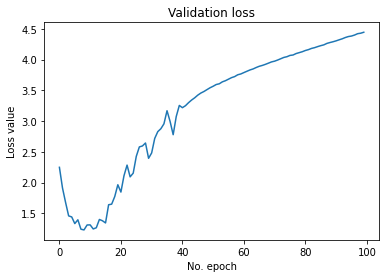

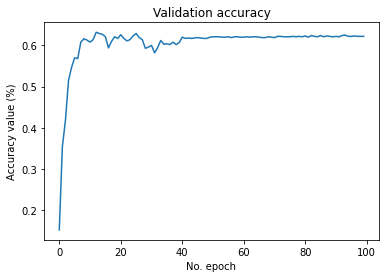

32/32 [==============================] - 0s 4ms/step - loss: 4.2265 - accuracy: 0.7160
Test loss: 4.226541042327881 / Test accuracy: 63.60%


In [316]:
# Plot : Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot : Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Unseen Test data Evaluation
score = model.evaluate(input_test, target_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]*100:.2f}%')